<a href="https://colab.research.google.com/github/MuhammadZain942/SpeechEmotionDetector/blob/main/SpeechEmotionDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
#  Importing modules
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import os
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Audio #to play audio


In [17]:
# Importing dataset

# Install Kaggle and KaggleHub
!pip install kaggle
!pip install kagglehub

# Import necessary modules
import kagglehub
import os

# Download dataset from Kaggle using KaggleHub
path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1


In [31]:


# Initialize lists for paths and labels
paths = []
labels = []

# Walk through the dataset directory and add paths and labels to lists
for dirpath, _, filenames in os.walk(path):
    for filename in filenames:
        # Full path to the file
        file_path = os.path.join(dirpath, filename)
        paths.append(file_path)
        # print(filename)

        # Extract the label (assumes labels are separated by `_` in filenames)
        label = filename.split('_')[-1].split('.')[0]   # Adjust this if labels differ
        labels.append(label.lower())


print(f'dataset is loaded')

dataset is loaded


In [29]:

# Print sample paths and labels
print("Sample paths:", paths[:5])
print("Sample labels:", labels[:5])


Sample paths: ['/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_disgust/YAF_numb_disgust.wav', '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_disgust/YAF_bite_disgust.wav', '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_disgust/YAF_thought_disgust.wav', '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_disgust/YAF_reach_disgust.wav', '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_disgust/YAF_calm_disgust.wav']
Sample labels: ['disgust', 'disgust', 'disgust', 'disgust', 'disgust']


In [32]:
# Creating Dataframe

df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels



In [34]:
df.sample(5)

,speech,label
254,/root/.cache/kagglehub/datasets/ejlok1/toronto...,angry
3906,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps
4607,/root/.cache/kagglehub/datasets/ejlok1/toronto...,sad
4612,/root/.cache/kagglehub/datasets/ejlok1/toronto...,sad
4885,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy


In [35]:
df['label'].value_counts()

,count
label,
disgust,800
angry,800
neutral,800
ps,800
fear,800
sad,800
happy,800


<Axes: xlabel='count', ylabel='label'>

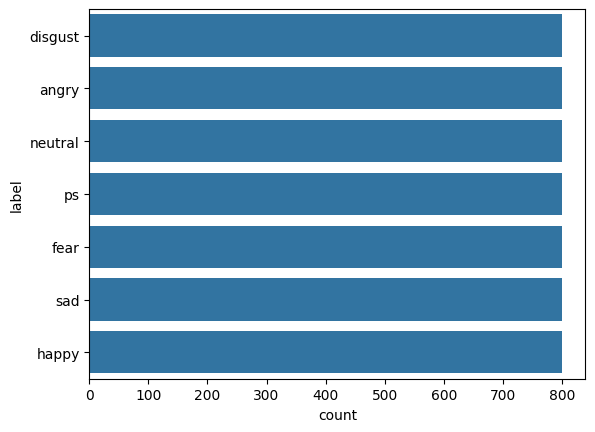

In [37]:
# EDA

sns.countplot(df['label'])

In [42]:
# Define the waveplot function
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)  # Updated to waveshow
    plt.show()

# Define the spectogram function
def spectogram(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    # Compute the spectrogram
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Fear/OAF_sour_fear.wav


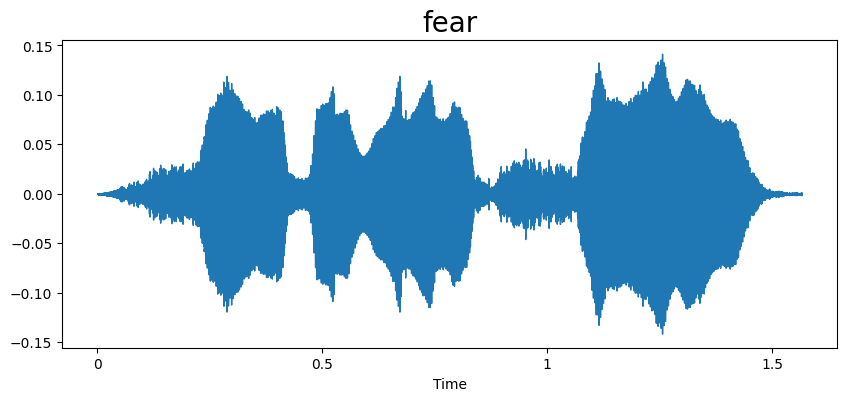

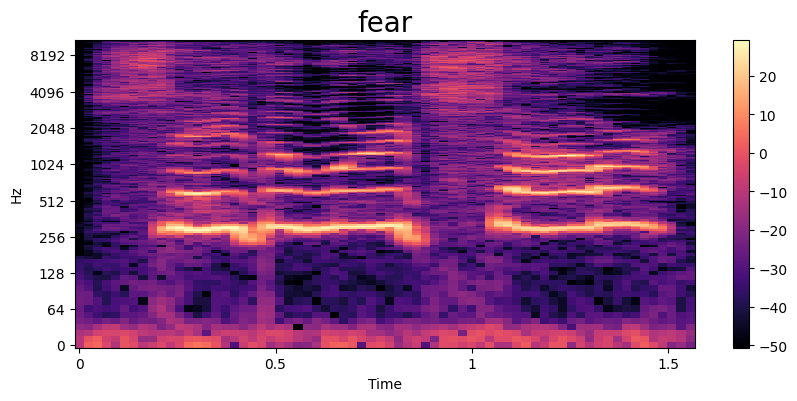

In [44]:
# defining all classes

emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
print(path)

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_angry/OAF_dodge_angry.wav


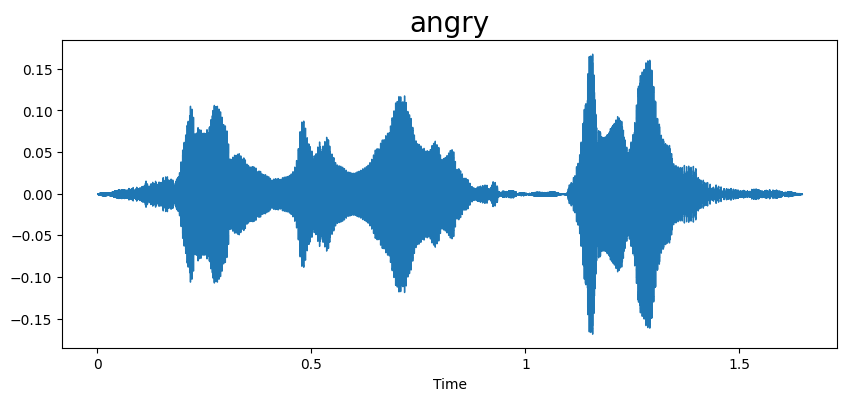

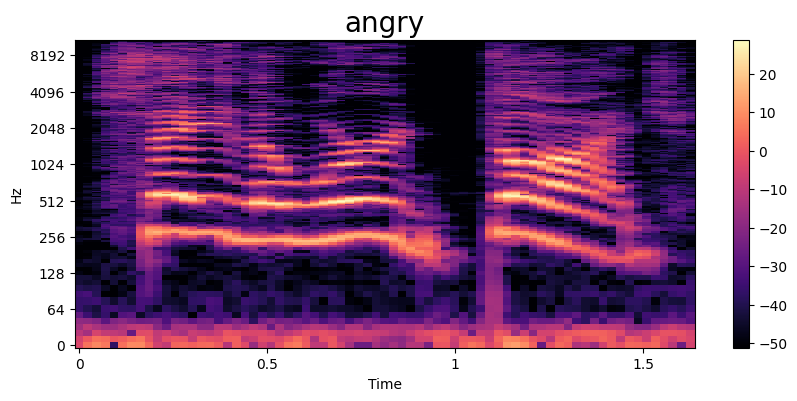

In [46]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[3]
print(path)

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_disgust/YAF_numb_disgust.wav


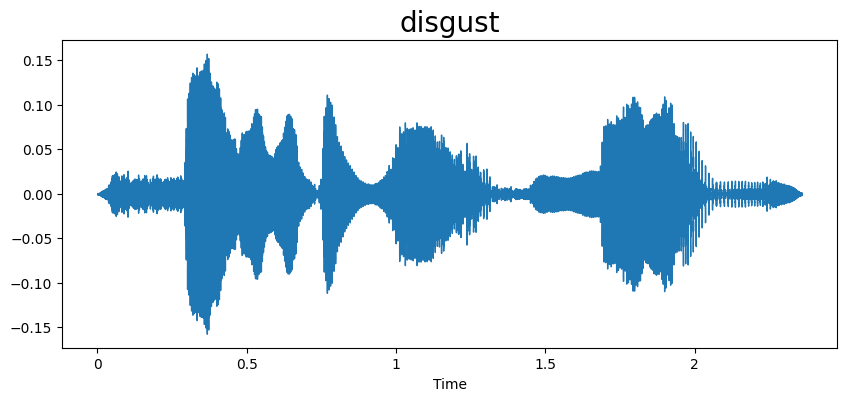

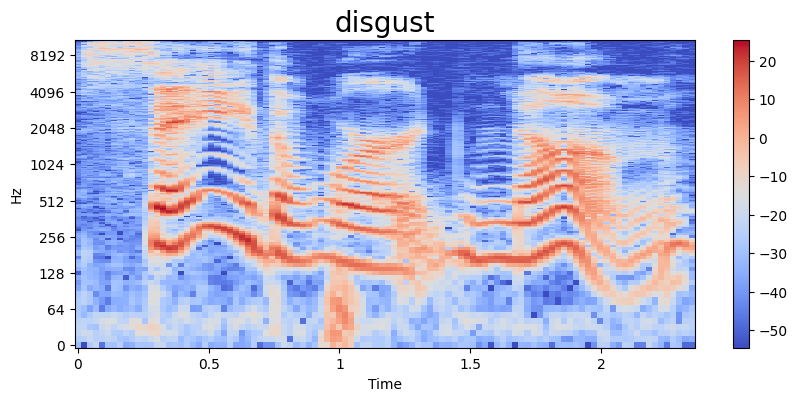

In [47]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
print(path)

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_sad/YAF_said_sad.wav


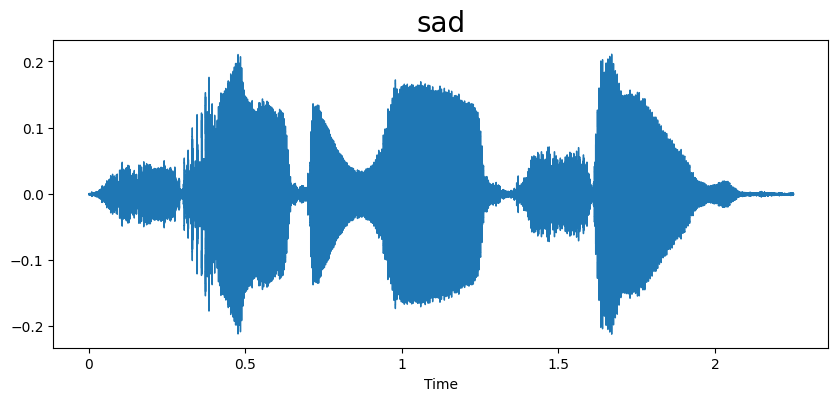

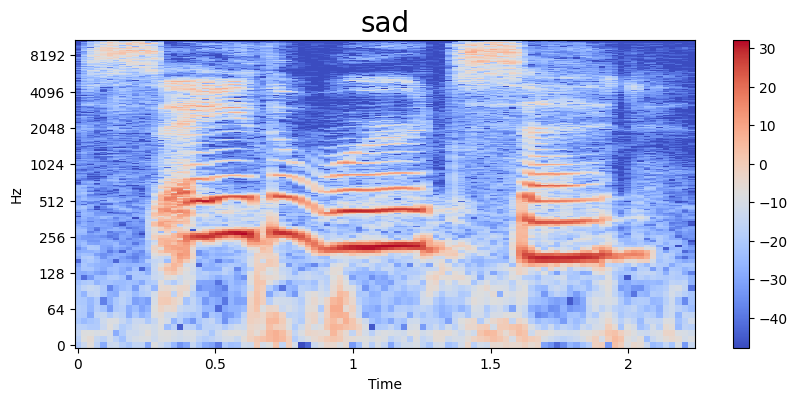

In [48]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
print(path)

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_neutral/OAF_keen_neutral.wav


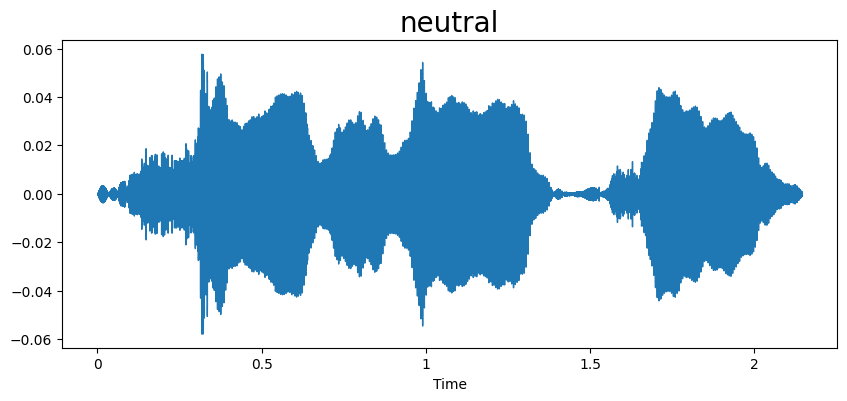

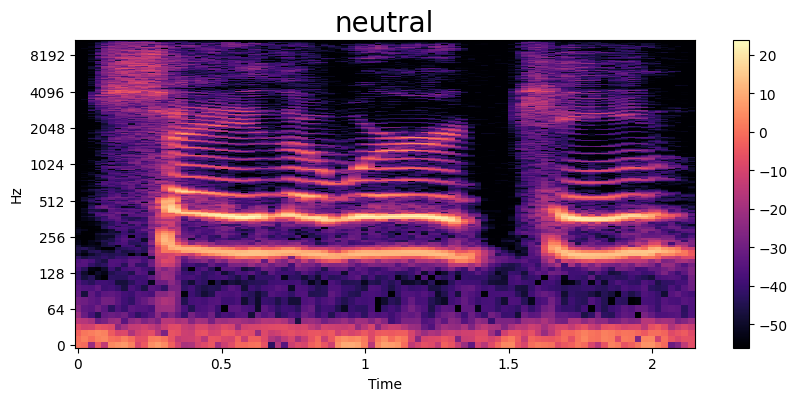

In [50]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[1]
print(path)

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_happy/OAF_hit_happy.wav


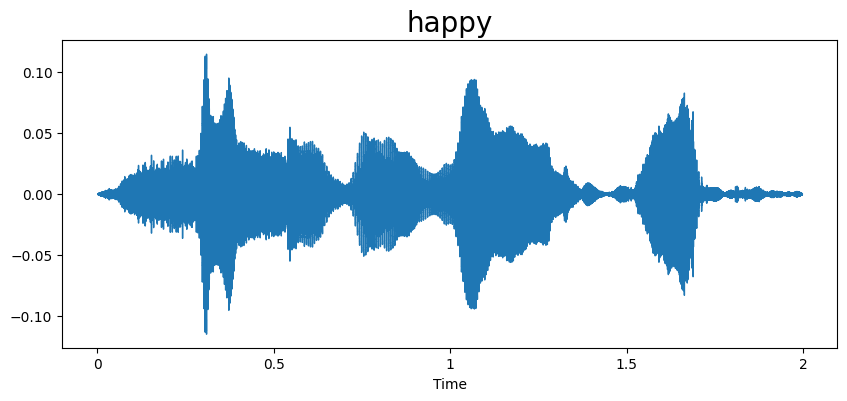

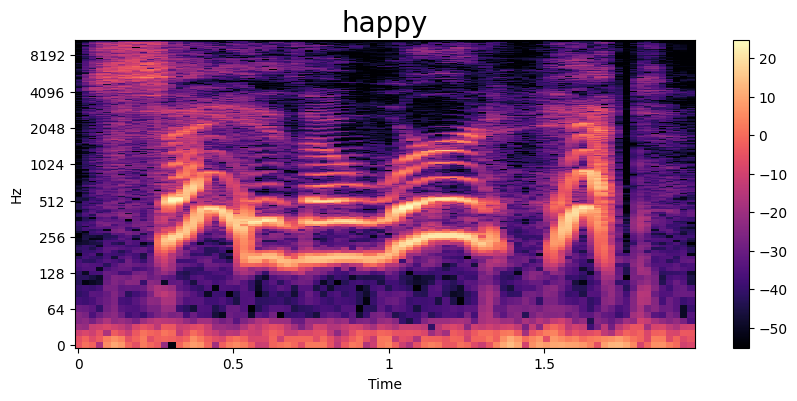

In [51]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
print(path)

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_sure_ps.wav


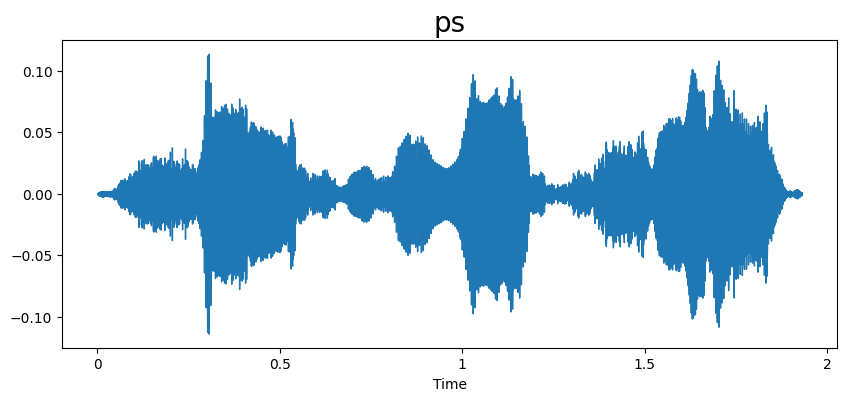

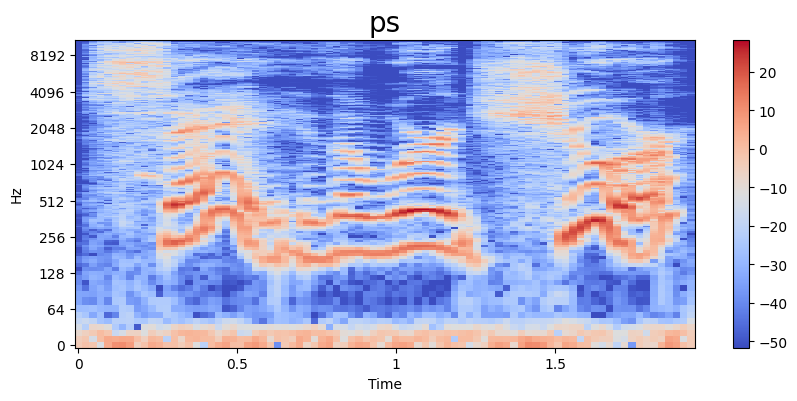

In [52]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
print(path)

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call the functions
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [53]:
# Feature extraction

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [54]:
extract_mfcc(df['speech'][1])

array([-4.12171387e+02,  8.06727448e+01, -3.15825319e+00,  2.36555424e+01,
       -1.01151609e+01, -1.69057536e+00, -6.41946697e+00, -1.44515781e+01,
       -9.09337044e+00, -2.93627858e+00, -1.05725965e+01,  4.71219540e+00,
       -1.03722181e+01,  1.79100299e+00, -3.26892090e+00, -7.42687988e+00,
       -5.83844066e-01,  7.27337956e-01, -7.15732718e+00, -3.38884282e+00,
       -3.40321398e+00, -2.67184567e+00, -6.27050877e+00,  5.39750957e+00,
       -5.42121649e+00,  9.73529220e-01, -2.47375631e+00,  2.03038788e+00,
       -1.10224344e-01,  3.14215803e+00, -2.08888292e+00,  4.16669035e+00,
        5.93425393e-01,  3.13481688e+00,  4.91986942e+00,  3.36162519e+00,
        3.45574641e+00,  4.73660421e+00,  1.40431356e+00,  6.73206472e+00],
      dtype=float32)

In [55]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [56]:
X_mfcc

,speech
0,"[-424.33807, 126.238235, -0.9996532, 18.667028..."
1,"[-412.1714, 80.672745, -3.1582532, 23.655542, ..."
2,"[-416.84616, 88.25328, -8.606146, 24.97578, -1..."
3,"[-417.6189, 72.79898, -3.4688535, 33.997734, -..."
4,"[-385.07043, 114.56533, -16.42542, 12.502726, ..."
...,...
5595,"[-516.85876, 99.76607, 21.719501, 6.5413666, 2..."
5596,"[-568.92444, 89.54974, 28.401987, 21.516354, 2..."
5597,"[-536.6411, 93.577324, 27.457087, 25.147121, 2..."
5598,"[-553.8178, 92.437546, 34.934868, 16.751532, 2..."


In [100]:
# coverting data in 2D array

X = [x for x in X_mfcc]
X = np.array(X)
X.shape

In [113]:
# input spliting

X = np.expand_dims(X , -1)
X.shape


# Assuming X_mfcc is a list of NumPy arrays
X = np.vstack(X_mfcc) # Flatten the nested structure
# Check the shape and data type of X
print(X.shape)
print(X.dtype)
# Convert X to float32 if needed
X = X.astype(np.float32)

(5600, 40)
float32


In [116]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Reshape df['label'] to be a 2D array
labels_reshaped = np.array(df['label']).reshape(-1, 1)

# Convert string labels to one-hot encoding
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(labels_reshaped).toarray()

print(y)
# Check the shape of the one-hot encoded array
print(y.shape)



[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(5600, 7)


In [119]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

model = Sequential()
model.add(LSTM(128, return_sequences=False, input_shape=(40,1), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))  # Increased dropout rate
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,431 (279.03 KB)

 Trainable params: 71,175 (278.03 KB)

 Non-trainable params: 256 (1.00 KB)

In [120]:
# Train the model with early stopping
history = model.fit(X, y, epochs=50, batch_size=512, validation_split=0.2, shuffle=True, )

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3127 - loss: 2.0611 - val_accuracy: 0.1723 - val_loss: 1.7750
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6681 - loss: 1.0064 - val_accuracy: 0.1643 - val_loss: 1.6760
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7462 - loss: 0.7607 - val_accuracy: 0.1955 - val_loss: 1.6057
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8101 - loss: 0.6100 - val_accuracy: 0.5580 - val_loss: 1.4683
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8544 - loss: 0.4985 - val_accuracy: 0.7179 - val_loss: 1.2517
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8892 - loss: 0.4039 - val_accuracy: 0.7661 - val_loss: 1.0858
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9120 - loss: 0.3389 - val_accuracy: 0.7795 - val_loss: 0.9153
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9350 - loss: 0.2752 - val_accuracy: 0.8321 - val_loss: 0.7963


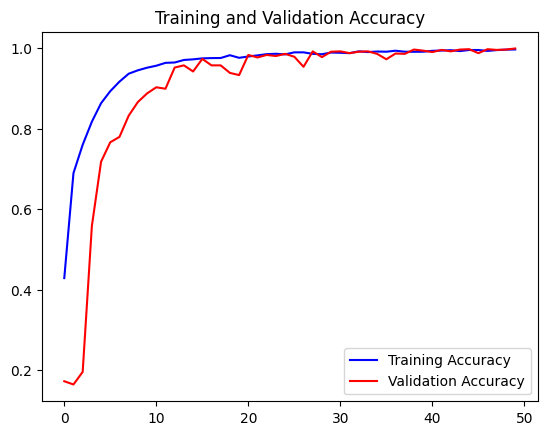

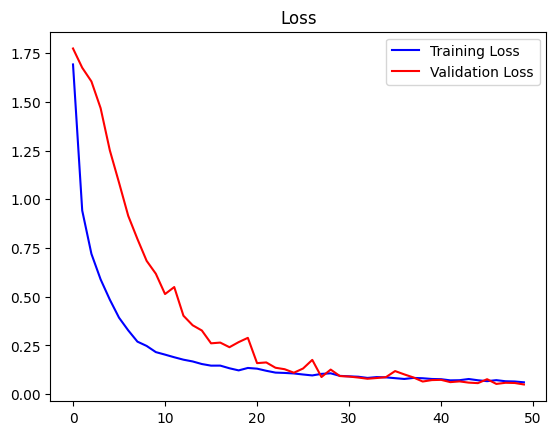

In [125]:
# Mapping result

epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()
